# ぱらぱらめくる『機械学習のエッセンス』

『機械学習のエッセンス』 ISBN:9784797393965

## 目次

1. 学習を始める前に
2. Pythonの基本
3. 機械学習に必要な数学
4. Pythonによる数値計算
5. 機械学習アルゴリズム

## 1. 学習を始める前に

この本の目標は『機械学習のいくつかの有名なアルゴリズムを、自分でゼロからPythonで実装する』こと。

その実装にあたっては、アルゴリズムの中身の理解の役に立てることを目標とする。そのため、高速化の点は犠牲にしてあることもある。

アルゴリズムの理解のための数学も扱う。

サンプルコードのダウンロードサイト： http://isbn.cbcr.jp/93965 
このサンプルコードを C:\\Users\\ryamada\\Desktop\\Samples というディレクトリとして解凍したとして進める

## 2. Pythonの基本

In [138]:
%pwd # print working directory

'C:\\Users\\ryamada'

In [139]:
# ファイルを指定して実行
%run -i C:\\Users\\ryamada\\Desktop\\Samples\\chap02\\ex2_01.py

15


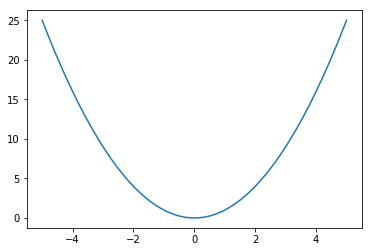

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5)
y = x**2
plt.plot(x, y)
plt.show()

In [141]:
# 数学関数はmath パッケージでもよいが、numpyの方が使い勝手がよい
import math as m
import numpy as np

print(m.sin(3))
print(np.sin(3))

# m.sin(3+1j) # エラーになる
print(np.sin(3+1j))

v = np.array([1,2,3])
# print(m.log(v)) # エラーになる
print(np.log(v))

0.1411200080598672
0.1411200080598672
(0.21775955162215221-1.1634403637032504j)
[0.         0.69314718 1.09861229]


In [146]:
# 複数の値の取り扱い
# リスト系
l = [1,2,3,4]
np_l = np.array([1,2,3,4])
np_l2d = np_l.reshape(2,2)
print(l)
print(np_l)
print(np_l2d)
l2 = [1,2,3,"a"] # 異なるデータタイプで格納
np_l2 = np.array([1,2,3,"a"]) # データタイプをそろえる
np_l3 = np.array(l2) # 引数としてリストを取る
print(l2)
print(np_l2)
print(np_l3)
# リストとnp.ndarrayの使い分け: https://note.nkmk.me/python-list-array-numpy-ndarray/ 

[1, 2, 3, 4]
[1 2 3 4]
[[1 2]
 [3 4]]
[1, 2, 3, 'a']
['1' '2' '3' 'a']
['1' '2' '3' 'a']


In [147]:
print(np.append(np.l,[3]))
print(np.append(np.l2d,[[5,6]],axis=0))

[1 2 3 4 3]
[[1 2]
 [3 4]
 [5 6]]


# tuple, dictionary & set

In [148]:
# tuple
t = 1,"a",1.5 + 2.3j
print(t)

(1, 'a', (1.5+2.3j))


In [149]:
u = t, t
print(u)

((1, 'a', (1.5+2.3j)), (1, 'a', (1.5+2.3j)))


In [150]:
list(u)

[(1, 'a', (1.5+2.3j)), (1, 'a', (1.5+2.3j))]

In [151]:
list(t)

[1, 'a', (1.5+2.3j)]

In [152]:
# dictionary (hashのようなもの)
d = {"a": 3, "bv": 2.4, '7': "5"}
print(d)

{'a': 3, 'bv': 2.4, '7': '5'}


In [153]:
d["7"]

'5'

In [154]:
d['bv']

2.4

In [155]:
for i in d:
    print(i)
for i in d.values():
    print(i)
for i in d.items():
    print(i)
for i in d.keys():
    print(i)

a
bv
7
3
2.4
5
('a', 3)
('bv', 2.4)
('7', '5')
a
bv
7


In [156]:
# set
a = set()
a.add("7")
a.add(1)
a.add(7)
print(a)
b = {1,2,3,4,7}
print(a & b)
print(a | b)
print(a - b)
for i in a:
    print(i)

{'7', 1, 7}
{1, 7}
{1, 2, 3, 4, 7, '7'}
{'7'}
7
1
7


In [157]:
# 関数を作る
def fx(a,b):
    c = a + 2*b
    return c**2

print(fx(2,1))
print((2+2*1)**2)

16
16


## クラス

クラスは色々な情報・要素を格納して、取り出しやすくする仕組み

情報・要素をクラスの属性としてそのまま取り出す場合もあれば、

情報・要素を一定の様式で格納する構造を定め、その構造に沿って情報・要素を格納した塊に名前を付けて、いくつも保持する場合もある。

後者の場合の個々の塊をクラスのインスタンスと言う。

In [158]:
# クラスを作る
# クラスを作るにあたって、中身を書かずに作ることはできないので、
# 何もしない」という意味の"pass"というコマンドを持たせることで、中身のないクラスを作ることができる
# 中身がない、とは、『クラスは存在する』が、クラスに帰属する情報・要素はないが
# インスタンスは作ることができるという意味である

In [159]:
class RyClass1:
    pass

In [160]:
a1 = RyClass1()
print(a1) # プリントするべきものが何も定義されていないので、デフォルト設定の文字列が生成されて表示されるらしい
# RyClass1はルートにあるクラス

## クラス変数

In [161]:
# クラスに情報を持たせてみる。たとえば、2 * pi という値を持たせることにする
class RyClass2:
    doublePi = 6.28 # 2*3.14
# これにより、以下のように、クラスの属性としてこの定数を取り出せる
print(RyClass2.doublePi)
# インスタンスを作り、インスタンス経由で取り出すこともできる
a2 = RyClass2()
print(a2.doublePi)

6.28
6.28


In [162]:
a2_2 = RyClass2()
print(RyClass2.doublePi)
print(a2_2.doublePi)

6.28
6.28


In [163]:
# それぞれのインスタンスの値は変えることができる
a2.doublePi = 5
a2_2.doublePi = 7
print(a2.doublePi)
print(a2_2.doublePi)
print(RyClass2.doublePi) # クラスの属性としての値は変わっていない
# クラスの属性としての値も変えることができる
RyClass2.doublePi = 9
print(RyClass2.doublePi)

5
7
6.28
9


In [164]:
# クラスのインスタンスごとに同じ呼び出し名で異なる値を持たせたり
# インスタンスに共通して同じ値を持たせたりすることができるが
# 前者を小文字変数、後者を大文字変数としておくことで、区別がつきやすくする習慣がある
# 後者のインスタンス共通の値は、クラス属性としての変数を変えれば、
# インスタンスのすべてについて一度に書き換えることもできる
# クラスに情報を持たせてみる。たとえば、2 * pi という値を持たせることにする
class RyClass2_2:
    DOUBLEPI = 6.28
    doublePi = 6.28 # 2*3.14

a2_3 = RyClass2_2()
a2_4 = RyClass2_2()
a2_3.doublePi = 10
a2_4.doublePi = 11
print(a2_3.doublePi)
print(a2_4.doublePi)
print(a2_3.DOUBLEPI)
print(a2_4.DOUBLEPI)
RyClass2_2.DOUBLEPI = 12
print(a2_3.DOUBLEPI)
print(a2_4.DOUBLEPI)

10
11
6.28
6.28
12
12


## クラス変数とインスタンス変数
小文字のクラス変数と大文字のクラス変数とで、使い方に違いを持たせることもできるが、面倒くさい。

クラス変数は変更しないことを暗黙のルールにし、
クラス変数とは別の仕組みで、インスタンスに直結した変数(インスタンス変数)と言うものを作ることにする。
インスタンス変数を作る仕組みとして、インスタンスを発生するときに、必ず変数を付与する、という仕組みを取ることにする。
それをインストラクタと呼ぶ。

In [165]:
class RyClass2_3:
    # クラス変数。大文字にして、変更しないことを原則とする
    # 変更するなら全インスタンスで一斉に変える
    DOUBLEPI = 6.28 
    
    def __init__(self):
        self.val1 = 0

In [166]:
a2_3_1 = RyClass2_3()
print(a2_3_1.DOUBLEPI)
print(a2_3_1.val1)
# インスタンス変数は変えてもよいことにして、自由に値を変えよう
a2_3_1.val1 = 3.33333
print(a2_3_1.val1)

6.28
0
3.33333


In [167]:
# インスタンス変数は、インスタンスの作成時に指定するようにもできる
class RyClass2_4:
    # クラス変数。大文字にして、変更しないことを原則とする
    # 変更するなら全インスタンスで一斉に変える
    DOUBLEPI = 6.28 
    
    def __init__(self,val1=0):
        self.val1 = val1

In [168]:
a2_4 = RyClass2_4() # デフォルト値として0が入る
print(a2_4.val1)
a2_4_2 = RyClass2_4(val1=1.111)
print(a2_4_2.val1)
# 引数指定を省略してもよい
a2_4_3 = RyClass2_4(2.2222)
print(a2_4_3.val1)

0
1.111
2.2222


## 関数を持たせる
変数にクラス変数とインスタンス変数があったように、
関数にも、クラス関数とインスタンス関数とがある。
クラス関数は、self引数を取らない関数で、インスタンス関数はself引数を取る関数である。
クラスの属性としてクラス関数を呼び出せる。
インスタンスの属性として、クラス関数もインスタンス関数も引き出せる。
(インスタンス発生後の書き換えをしないとすれば)クラス関数はすべてのインスタンスに共通で、インスタンス関数は、インスタンスごとに係数などを変えることが出来る。

In [169]:
# クラスの情報には、関数も取れる
class RyClass3:
    DOUBLEPI = 6.28 # クラス変数
    
    def __init__(self,val1=0):
        self.val1 = val1 # インスタンス変数
    
    def f1(x,y): # クラス関数
        return RyClass3.DOUBLEPI * x + y
    def f2(self,x,y): # インスタンス変数
        return self.DOUBLEPI * x + y + self.val1

print(RyClass3.f1(1,2))
a3 = RyClass3(val1=0.0000011111)
print(a3.f2(1,2))
a3_2 = RyClass3(val1=100)
print(a3_2.f2(1,2))
# このRyClass3.f1() という関数は、インスタンスa3の関数ではないので、
# a3.f1()とは呼び出せない

8.280000000000001
8.2800011111
108.28


## インスタンス情報を表示させる

インスタンスにprint()関数を適用したときに、有用な情報が表示されると便利である。
print()関数は、インスタンス関数として、\__str__(self)の返り値を表示するように作られているので、
そのような関数を定義しておくと便利。
このように、何かしらの理由で、"\__"で囲まれた名前を持つ関数を特殊関数と言う。
同様に"\__"で囲まれた名前のインスタンス変数も、特殊な役割を持つ。

In [186]:
class RyClass4:
    DOUBLEPI = 6.28 # クラス変数
    
    def __init__(self,val1=0):
        self.val1 = val1 # インスタンス変数
    def __str__(self):
        return "RyClass4" + " val = " + str(self.val1)
    
    def f1(x,y): # クラス関数
        return RyClass3.DOUBLEPI * x + y
    def f2(self,x,y): # インスタンス変数
        return self.DOUBLEPI * x + y + self.val1

In [187]:
a4 = RyClass4(100)
print(a4)

RyClass4 val = 100
122.84


## 他にも色々な特殊関数
たとえば、インスタンス変数を返す "__dict__()"など。

In [170]:
print(a3_2.__dict__)

{'val1': 100}
